In [93]:
import pandas as pd
import numpy as np

In [94]:
df = pd.read_csv('/content/drive/MyDrive/deep_learning_bootcamp/day1/housepricedata.csv')

In [95]:
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [96]:
dataset = df.values

In [97]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [98]:
# selecting the input features and output labels
x = dataset[:,0:10]
y = dataset[:,10]

In [99]:
# preprocessing of input dataset
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scale = min_max_scaler.fit_transform(x)

In [100]:
# checking data after preprocessing
x_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [101]:
from sklearn.model_selection import train_test_split
x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(x_scale, y, test_size=0.3, random_state=10)

x_val, x_test, y_val, y_test = train_test_split(x_val_and_test, y_val_and_test, test_size=0.5)
print(x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [102]:
y_val.shape

(219,)

In [103]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras
from tensorflow.keras import layers
import timeit

# defining the model
model = Sequential()

# input layer
model.add(Dense(32, activation='relu', input_shape=(10,)))
model.add(Dense(32, activation='relu'))

# output layer
model.add(Dense(1, activation='sigmoid'))

# alternate way of setting optimizer
# opt = keras.optimizers.Adam(learning_rate = 0.0001)
# model.compile(optimizer=opt,
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# hyper parameter tuning 
# compiling model
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

# checking training time
start = timeit.default_timer()
hist = model.fit(x_train,
                 y_train,
                 batch_size=256,
                 epochs=100,
                 validation_data=(x_val, y_val),
                 verbose=1
                 )
stop = timeit.default_timer()
print('Time: ', (stop - start)/60, 'minutes')

model.summary()

Epoch 1/100
4/4 [==============================] - 1s 70ms/step - loss: 0.6775 - accuracy: 0.6164 - val_loss: 0.6704 - val_accuracy: 0.6073
Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: 0.6692 - accuracy: 0.6057 - val_loss: 0.6619 - val_accuracy: 0.6119
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 0.6611 - accuracy: 0.6174 - val_loss: 0.6537 - val_accuracy: 0.6621
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 0.6531 - accuracy: 0.6585 - val_loss: 0.6448 - val_accuracy: 0.7123
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 0.6444 - accuracy: 0.7065 - val_loss: 0.6359 - val_accuracy: 0.7443
Epoch 6/100
4/4 [==============================] - 0s 13ms/step - loss: 0.6357 - accuracy: 0.7476 - val_loss: 0.6272 - val_accuracy: 0.7808
Epoch 7/100
4/4 [==============================] - 0s 20ms/step - loss: 0.6269 - accuracy: 0.7720 - val_loss: 0.6179 - val_accuracy: 0.7991
Epoch 8/100
4/4 [===

In [104]:
# calculate the accuracy
_, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy * 100))

7/7 [==============================] - 0s 2ms/step - loss: 0.2560 - accuracy: 0.8676
Accuracy: 86.76


In [105]:
print('generate the output')
y_hat = model.predict(x_test)
y_hat = y_hat.round()

generate the output


In [106]:
np.column_stack((y_test[:6],y_hat[:6]))

array([[0., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [0., 0.],
       [0., 0.]])

In [107]:
from sklearn.metrics import accuracy_score
test_score = accuracy_score(y_hat, y_test)
print(test_score)

0.867579908675799


In [108]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_hat, y_test)
matrix

array([[106,  17],
       [ 12,  84]])

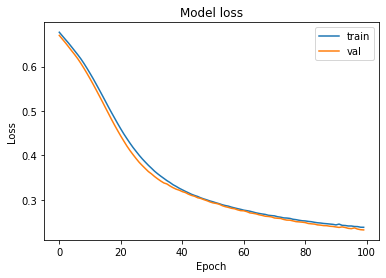

In [109]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

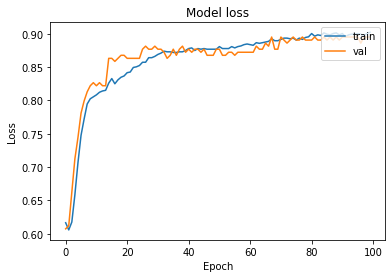

In [110]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()